## Sprint1 課題　機械学習フロー

#### 1.このSprintについて

##### Sprintの目的
機械学習の実践的な流れを知る
高い汎化性能を持つモデルを完成させる ### どのように学ぶか 丁寧な検証が行える状態にした上で、他者の解法を参考に汎化性能の高いモデル作りを進めます。

#### 2.機械学習フロー
Kaggleの Home Credit Default Risk コンペティションを題材に、機械学習の実践的な流れを学びます。特に適切な 検証 を行い、高い 汎化性能 のあるモデルを完成させることを目指します。

Home Credit Default Risk | Kaggle

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿

### 【問題1】クロスバリデーション 
事前学習期間では検証用データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。

事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。

sklearn.model_selection.KFold — scikit-learn 0.21.3 documentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv("application_train.csv")
df.head()

FileNotFoundError: File b'application_train.csv' does not exist

In [3]:
df.isnull().sum()
df_drop = df.dropna()
df_drop.isnull().sum()
df_drop.shape

(8602, 122)

In [4]:
X_ = df_drop.drop("TARGET",axis=1)
y_ = df_drop.loc[:,["TARGET"]]

In [5]:
df_drop_no_object = df_drop.select_dtypes(exclude=object)
df_drop_no_object.shape
#df_drop.shape

(8602, 106)

In [6]:
df_drop_no_object_ary = df_drop_no_object.values
df_drop_no_object_ary.shape

(8602, 106)

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
n=1
for train_index, test_index in kf.split(df_drop_no_object_ary):
    print("-----{}回目-----".format(n))
    print("Train:{},Test:{}".format(len(train_index), len(test_index)))
    print("Train:{},Test:{}".format(len(train_index), len(test_index)))

#    display(df_drop_no_object.iloc[train_index,:])
    X_train = df_drop_no_object.iloc[train_index,:].drop("TARGET",axis=1)
    y_train = df_drop_no_object.iloc[train_index,:].loc[:,["TARGET"]]
    X_test = df_drop_no_object.iloc[test_index,:].drop("TARGET",axis=1)
    y_test = df_drop_no_object.iloc[test_index,:].loc[:,["TARGET"]]
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train) 

    print("accuracy_score：{:.3g}".format(accuracy_score(y_test, neigh.predict(X_test))))
    print("precision_score：{:.3g}".format(precision_score(y_test, neigh.predict(X_test))))
    print("recall_score：{:.3g}".format(recall_score(y_test, neigh.predict(X_test))))
    print("f1_score：{:.3g}".format(f1_score(y_test, neigh.predict(X_test))))
    n +=1

-----1回目-----
Train:6881,Test:1721
Train:6881,Test:1721


C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


accuracy_score：0.937
precision_score：0.167
recall_score：0.00962
f1_score：0.0182
-----2回目-----
Train:6881,Test:1721
Train:6881,Test:1721


C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


accuracy_score：0.949
precision_score：0
recall_score：0
f1_score：0
-----3回目-----
Train:6882,Test:1720
Train:6882,Test:1720


C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


accuracy_score：0.94
precision_score：0
recall_score：0
f1_score：0
-----4回目-----
Train:6882,Test:1720
Train:6882,Test:1720


C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


accuracy_score：0.923
precision_score：0
recall_score：0
f1_score：0
-----5回目-----
Train:6882,Test:1720
Train:6882,Test:1720


C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


accuracy_score：0.933
precision_score：0.125
recall_score：0.00909
f1_score：0.0169


### 【問題2】グリッドサーチ 
これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。

scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。

sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation

GridSearchCVクラスには引数としてモデル、探索範囲、さらにクロスバリデーションを何分割で行うかを与えます。クロスバリデーションの機能も含まれているため、これを使用する場合はKFoldクラスを利用する必要はありません。

In [8]:
X = df_drop_no_object.drop("TARGET",axis=1)
y = df_drop_no_object.loc[:,["TARGET"]]

In [9]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier(random_state=0)
params = {
     'n_estimators'      : [5, 10, 20],
      'random_state'      : [0],
      'max_depth'         : [5, 10, 20]
}
gs = GridSearchCV(RFC, params,   scoring='roc_auc',
#                 scoring='f1',
                  cv=5,            # クロスバリデーションの分割数
                  verbose=4,    # ログ表示
                 )
gs.fit(X, y)
# 探索した結果のベストスコアとパラメータの取得
print('Best Score:{}'.format(gs.best_score_))
print('Best Params{}'.format(gs.best_params_))                             

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=5, n_estimators=5, random_state=0 .....................
[CV]  max_depth=5, n_estimators=5, random_state=0, score=0.658027624696432, total=   0.0s
[CV] max_depth=5, n_estimators=5, random_state=0 .....................
[CV]  max_depth=5, n_estimators=5, random_state=0, score=0.6757216570838862, total=   0.0s
[CV] max_depth=5, n_estimators=5, random_state=0 .....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_tra

[CV]  max_depth=5, n_estimators=5, random_state=0, score=0.6710039805395843, total=   0.0s
[CV] max_depth=5, n_estimators=5, random_state=0 .....................
[CV]  max_depth=5, n_estimators=5, random_state=0, score=0.6916349697773847, total=   0.0s
[CV] max_depth=5, n_estimators=5, random_state=0 .....................
[CV]  max_depth=5, n_estimators=5, random_state=0, score=0.6631077694235591, total=   0.0s
[CV] max_depth=5, n_estimators=10, random_state=0 ....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=10, random_state=0, score=0.6582407061460863, total=   0.0s
[CV] max_depth=5, n_estimators=10, random_state=0 ....................
[CV]  max_depth=5, n_estimators=10, random_state=0, score=0.7250213769718412, total=   0.0s
[CV] max_depth=5, n_estimators=10, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=10, random_state=0, score=0.6828748341441839, total=   0.0s
[CV] max_depth=5, n_estimators=10, random_state=0 ....................
[CV]  max_depth=5, n_estimators=10, random_state=0, score=0.6967624944714729, total=   0.0s
[CV] max_depth=5, n_estimators=10, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=10, random_state=0, score=0.5147250479139024, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=20, random_state=0, score=0.6905006538389687, total=   0.1s
[CV] max_depth=5, n_estimators=20, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=20, random_state=0, score=0.7300044228217604, total=   0.1s
[CV] max_depth=5, n_estimators=20, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=20, random_state=0, score=0.6958631873802151, total=   0.1s
[CV] max_depth=5, n_estimators=20, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=20, random_state=0, score=0.7190387734040984, total=   0.1s
[CV] max_depth=5, n_estimators=20, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, n_estimators=20, random_state=0, score=0.5266165413533834, total=   0.2s
[CV] max_depth=10, n_estimators=5, random_state=0 ....................
[CV]  max_depth=10, n_estimators=5, random_state=0, score=0.586624906594433, total=   0.0s
[CV] max_depth=10, n_estimators=5, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=5, random_state=0, score=0.5811676249447147, total=   0.0s
[CV] max_depth=10, n_estimators=5, random_state=0 ....................
[CV]  max_depth=10, n_estimators=5, random_state=0, score=0.6462774583517618, total=   0.0s
[CV] max_depth=10, n_estimators=5, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=5, random_state=0, score=0.600094353530886, total=   0.0s
[CV] max_depth=10, n_estimators=5, random_state=0 ....................
[CV]  max_depth=10, n_estimators=5, random_state=0, score=0.5257260799056465, total=   0.0s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=10, random_state=0, score=0.5930552960956472, total=   0.2s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=10, random_state=0, score=0.6100132684652808, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=10, random_state=0, score=0.672251216275984, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=10, random_state=0, score=0.6454931446262716, total=   0.1s
[CV] max_depth=10, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=10, random_state=0, score=0.5770042753943683, total=   0.1s
[CV] max_depth=10, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=20, random_state=0, score=0.6261909209788904, total=   0.3s
[CV] max_depth=10, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=20, random_state=0, score=0.6370278637770898, total=   0.3s
[CV] max_depth=10, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=20, random_state=0, score=0.662874834144184, total=   0.3s
[CV] max_depth=10, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=20, random_state=0, score=0.678720330237358, total=   0.3s
[CV] max_depth=10, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, n_estimators=20, random_state=0, score=0.5624296034203154, total=   0.3s
[CV] max_depth=20, n_estimators=5, random_state=0 ....................
[CV]  max_depth=20, n_estimators=5, random_state=0, score=0.5795727862880627, total=   0.1s
[CV] max_depth=20, n_estimators=5, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=5, random_state=0, score=0.5791537667698659, total=   0.1s
[CV] max_depth=20, n_estimators=5, random_state=0 ....................
[CV]  max_depth=20, n_estimators=5, random_state=0, score=0.5997847560076662, total=   0.1s
[CV] max_depth=20, n_estimators=5, random_state=0 ....................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=5, random_state=0, score=0.5902403066489754, total=   0.0s
[CV] max_depth=20, n_estimators=5, random_state=0 ....................
[CV]  max_depth=20, n_estimators=5, random_state=0, score=0.5834704408079021, total=   0.0s
[CV] max_depth=20, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=10, random_state=0, score=0.6340253129086494, total=   0.2s
[CV] max_depth=20, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=10, random_state=0, score=0.6184608580274216, total=   0.2s
[CV] max_depth=20, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=10, random_state=0, score=0.6450272740675218, total=   0.2s
[CV] max_depth=20, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=10, random_state=0, score=0.6385581601061476, total=   0.2s
[CV] max_depth=20, n_estimators=10, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=10, random_state=0, score=0.6430664897537963, total=   0.2s
[CV] max_depth=20, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=20, random_state=0, score=0.6454324677750793, total=   0.5s
[CV] max_depth=20, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=20, random_state=0, score=0.636296623912723, total=   0.4s
[CV] max_depth=20, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=20, random_state=0, score=0.6583782986878962, total=   0.4s
[CV] max_depth=20, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=20, random_state=0, score=0.6417897685389946, total=   0.4s
[CV] max_depth=20, n_estimators=20, random_state=0 ...................


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, n_estimators=20, random_state=0, score=0.6424590888987174, total=   0.4s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   11.5s finished
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score:0.6724089231389178
Best Params{'max_depth': 5, 'n_estimators': 20, 'random_state': 0}


### 【問題3】Kernelからの調査 
KaggleのKernelから様々なアイデアを見つけ出して、列挙してください。

In [3]:
df_train = pd.read_csv(r"C:\Users\anai\dive\Dataset\application_train.csv")
df_test = pd.read_csv(r"C:\Users\anai\dive\Dataset\application_test.csv")
display(df_train.shape)
display(df_test.shape)
df_train_no_y = df_train.drop("TARGET",axis=1)
df = pd.concat([df_train_no_y, df_test])
df.shape

(307511, 122)

(48744, 121)

(356255, 121)

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

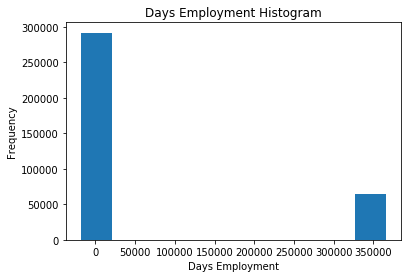

In [4]:
#DAYS_EMPLOYEDのMAX値が1000年以上と、ありえない数字になっている。
display(df['DAYS_EMPLOYED'].describe())
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [5]:
#1hot-encodingでTestDataとTrainDataのカラム数がずれた(Train多)場合に、TrainDataんおカラムを消して数合わせする方法
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

NameError: name 'app_train' is not defined

In [ ]:
#各カラムの欠損数一覧を表示させる関数
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
#Objectが何種類で構成されているかの一覧を表示させるコマンド
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

In [ ]:
#TARGETの0と1でヒストグラムの線を書いて比較するコード
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

### 【問題4】高い汎化性能のモデル作成 
問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。
その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

In [4]:
#TrainﾃﾞｰﾀとTestﾃﾞｰﾀを結合
df_train = pd.read_csv(r"C:\Users\anai\dive\Dataset\application_train.csv")
df_test = pd.read_csv(r"C:\Users\anai\dive\Dataset\application_test.csv")
df_train_no_y = df_train.drop("TARGET",axis=1)
df = pd.concat([df_train_no_y, df_test])
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#DAYS_BIRtHがマイナスになっているのを是正。ついでに365で割って何歳か示すようにし、少数切り捨てで離散化。
display(df["DAYS_BIRTH"].describe())
df['DAYS_BIRTH']=(df['DAYS_BIRTH'].values // -365)
df['DAYS_BIRTH'].describe()

count    356255.000000
mean     -16041.248841
std        4358.803980
min      -25229.000000
25%      -19676.000000
50%      -15755.000000
75%      -12425.000000
max       -7338.000000
Name: DAYS_BIRTH, dtype: float64

count    356255.000000
mean         43.448375
std          11.940964
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

There are 64648 anomalous days of employment


count    291607.000000
mean      -2396.698937
std        2334.479967
min      -17912.000000
25%       -3200.000000
50%       -1663.000000
75%        -780.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

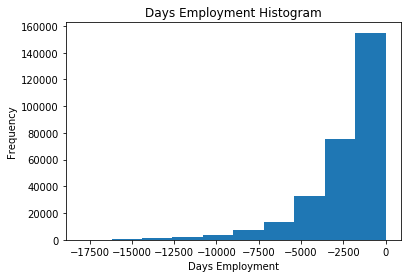

In [6]:
#'DAYS_EMPLOYED'の異常なデータを除いた分布を確認
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]
print('There are %d anomalous days of employment' % len(anom))
non_anom['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', range=(-18000, 0))
plt.xlabel('Days Employment')
non_anom['DAYS_EMPLOYED'].describe()

In [7]:
#"DAYS_EMPLOYED"の最頻値確認
df.query("DAYS_EMPLOYED==365243").shape
non_anom["DAYS_EMPLOYED"].mode()

0   -200
dtype: int64

count    356255.000000
mean       1998.073815
std        2275.434713
min           0.000000
25%         290.000000
50%        1224.000000
75%        2781.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

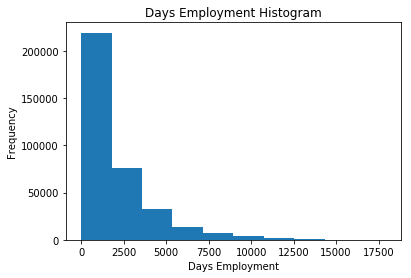

In [8]:
#"DAYS_EMPLOYED"の異常値を最頻値に置き換え
df["DAYS_EMPLOYED"]=df["DAYS_EMPLOYED"].replace(365243, -200)
df['DAYS_EMPLOYED']=(df['DAYS_EMPLOYED'] * -1)
display(df["DAYS_EMPLOYED"].describe())
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 331.6+ MB


In [10]:
#intの各特徴量内が何種類の数値になっているか確認
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     356255
CNT_CHILDREN                       16
DAYS_BIRTH                         50
DAYS_EMPLOYED                   12895
DAYS_ID_PUBLISH                  6224
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         4
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMEN

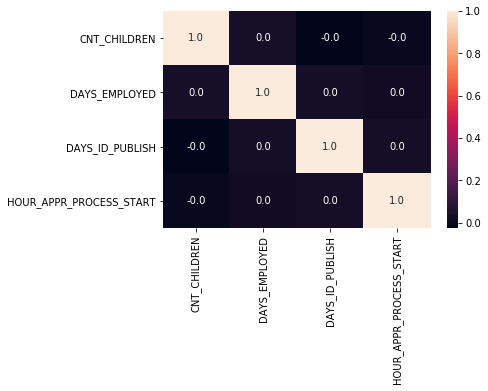

In [11]:
#intで種類数が多いものに対し、ヒートマップで相関関係を確認
import seaborn as sns
df_int = df.select_dtypes(include="int64")
df_int_select = df_int.loc[:,["CNT_CHILDREN", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH", "HOUR_APPR_PROCESS_START"]]
df_int_select_corr = df_int_select.corr()
sns.heatmap(df_int_select_corr, annot=True, fmt="1.1f")

In [12]:
#floatでintと同様に、各特徴量内が何種類の数値になっているか確認
pd.set_option("display.max_rows", 100)
df.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  2741
AMT_CREDIT                        6480
AMT_ANNUITY                      14166
AMT_GOODS_PRICE                   1291
REGION_POPULATION_RELATIVE          82
DAYS_REGISTRATION                15898
OWN_CAR_AGE                         63
CNT_FAM_MEMBERS                     18
EXT_SOURCE_1                    134315
EXT_SOURCE_2                    127157
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2391
BASEMENTAREA_AVG                  3831
YEARS_BEGINEXPLUATATION_AVG        294
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3271
ELEVATORS_AVG                      266
ENTRANCES_AVG                      294
FLOORSMAX_AVG                      414
FLOORSMIN_AVG                      318
LANDAREA_AVG                      3580
LIVINGAPARTMENTS_AVG              1917
LIVINGAREA_AVG                    5272
NONLIVINGAPARTMENTS_AVG            410
NONLIVINGAREA_AVG                 3397
APARTMENTS_MODE          

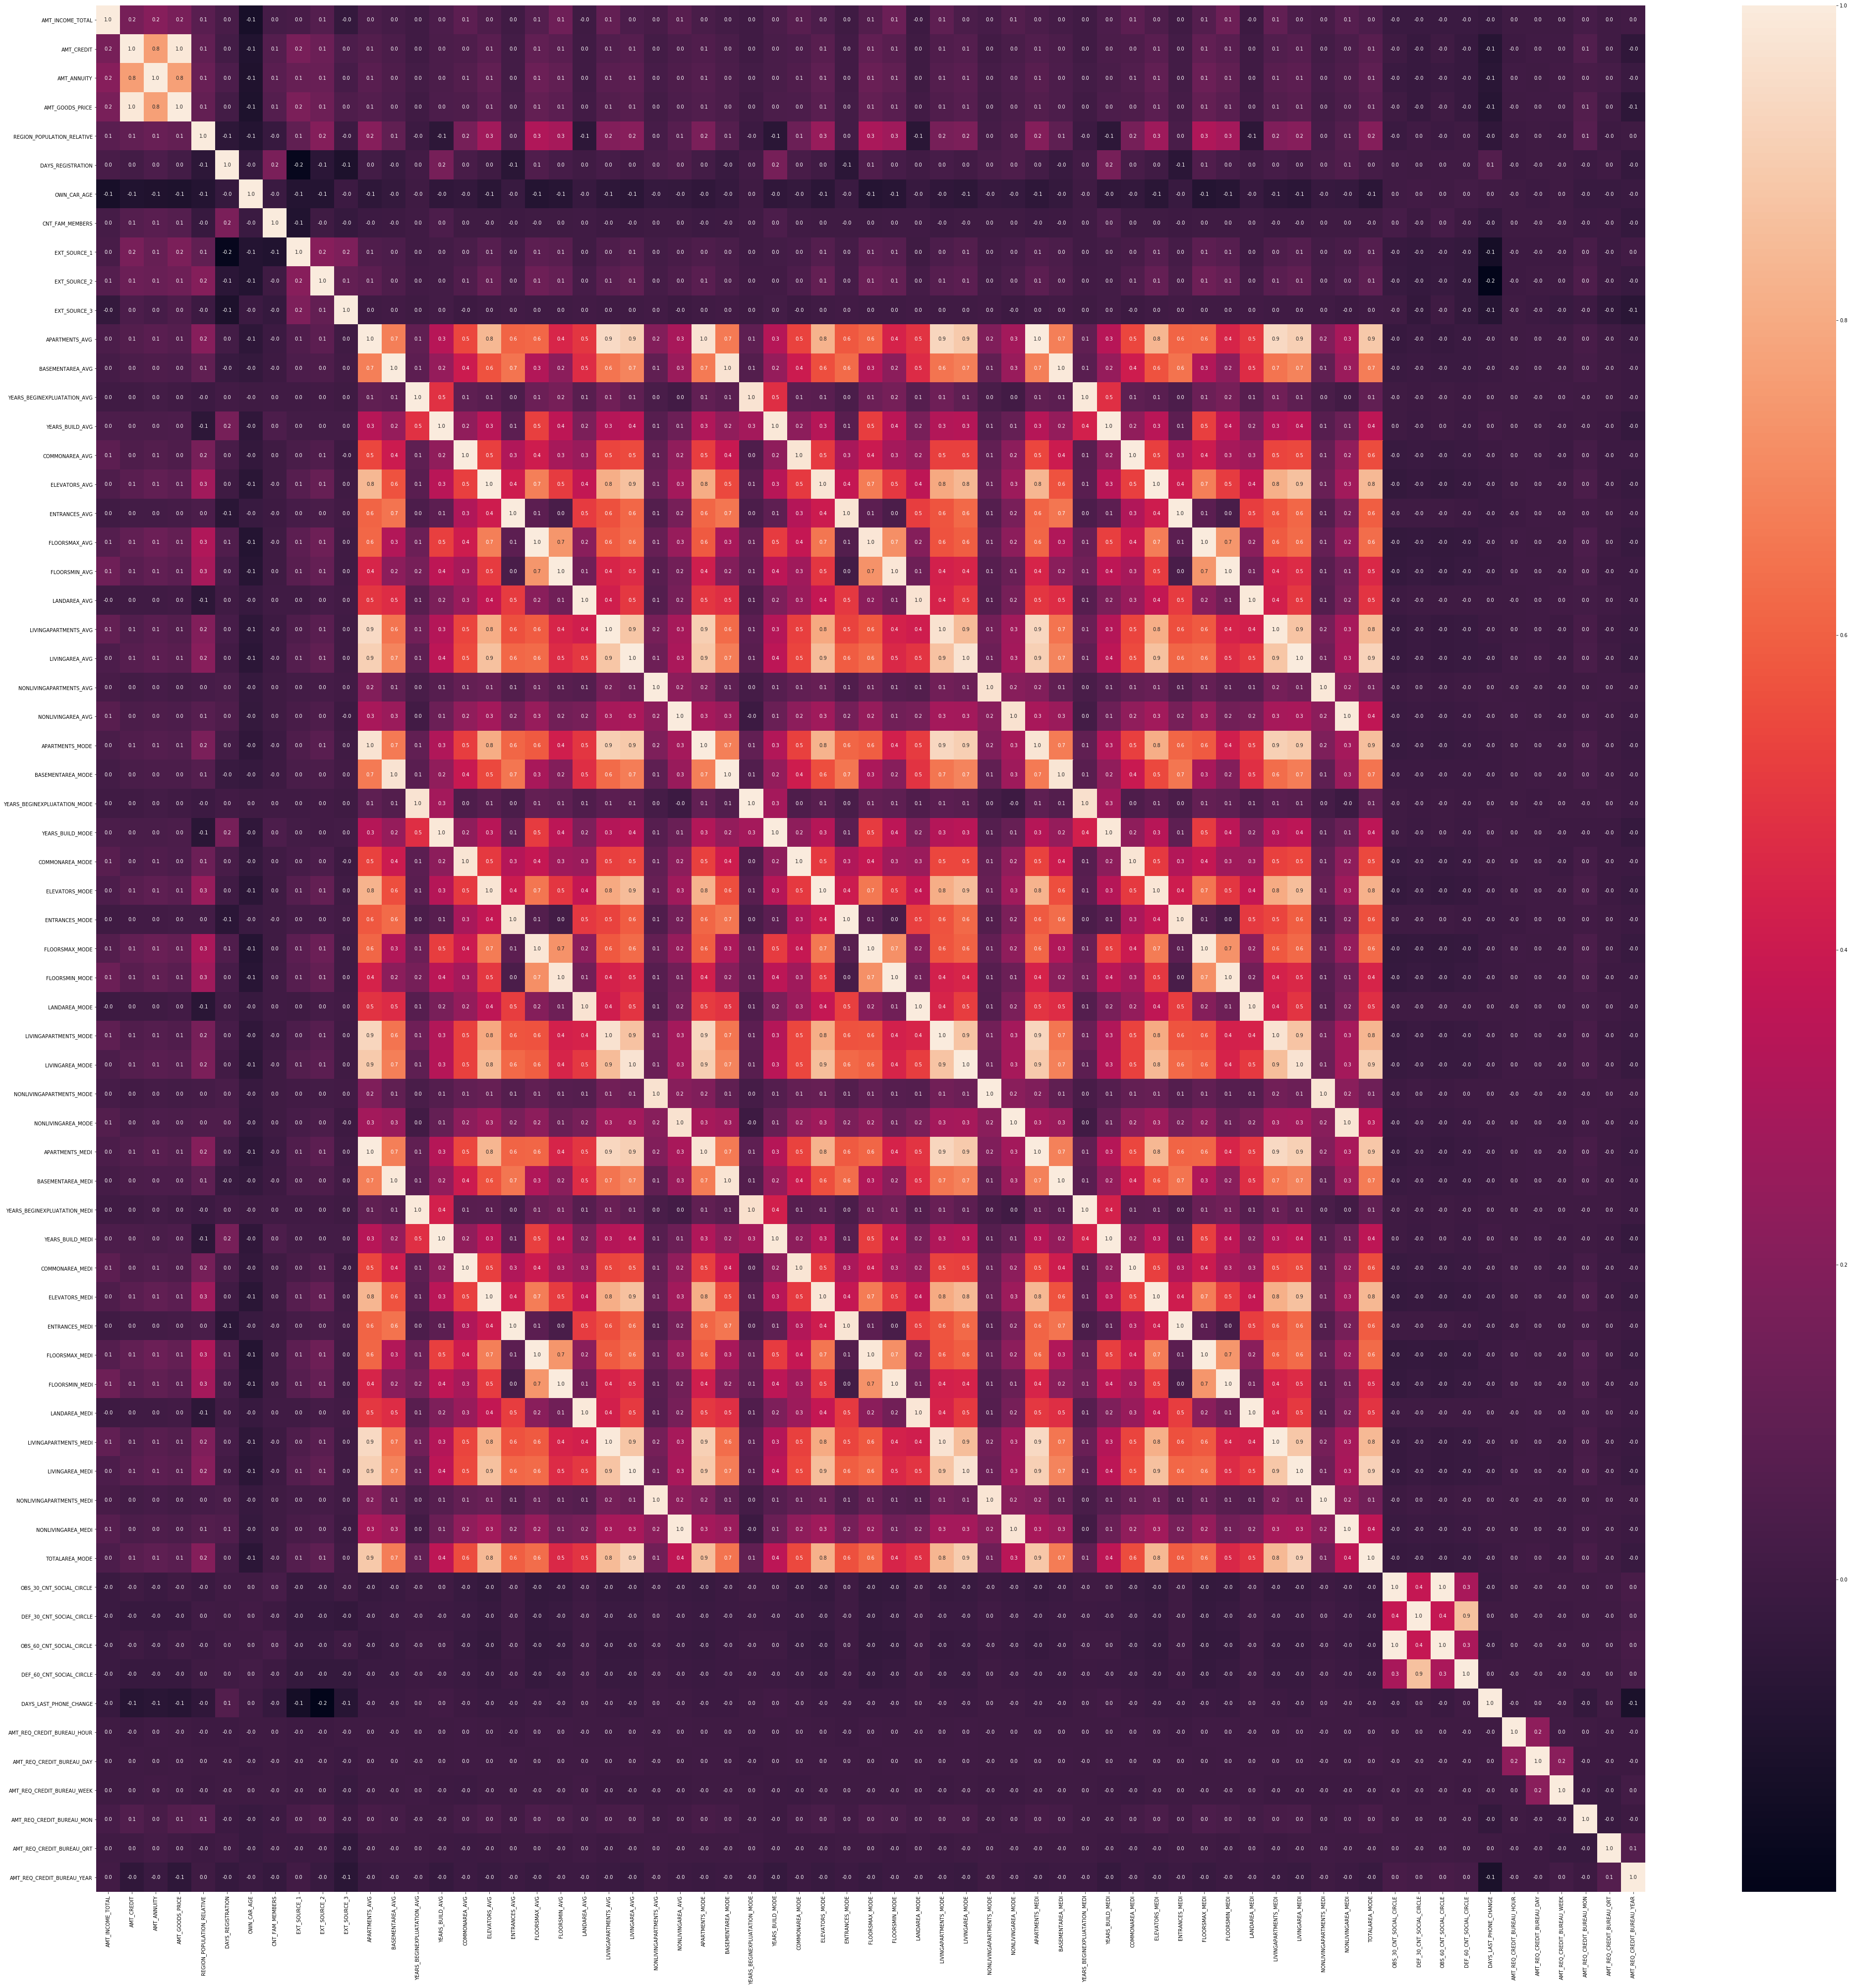

In [13]:
#floatでヒートマップにて相関関係を確認
df_float = df.select_dtypes(include="float64")
df_float_corr = df_float.corr()

plt.figure(figsize=(70, 70)) 
sns.heatmap(df_float_corr, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_float_corr.png')

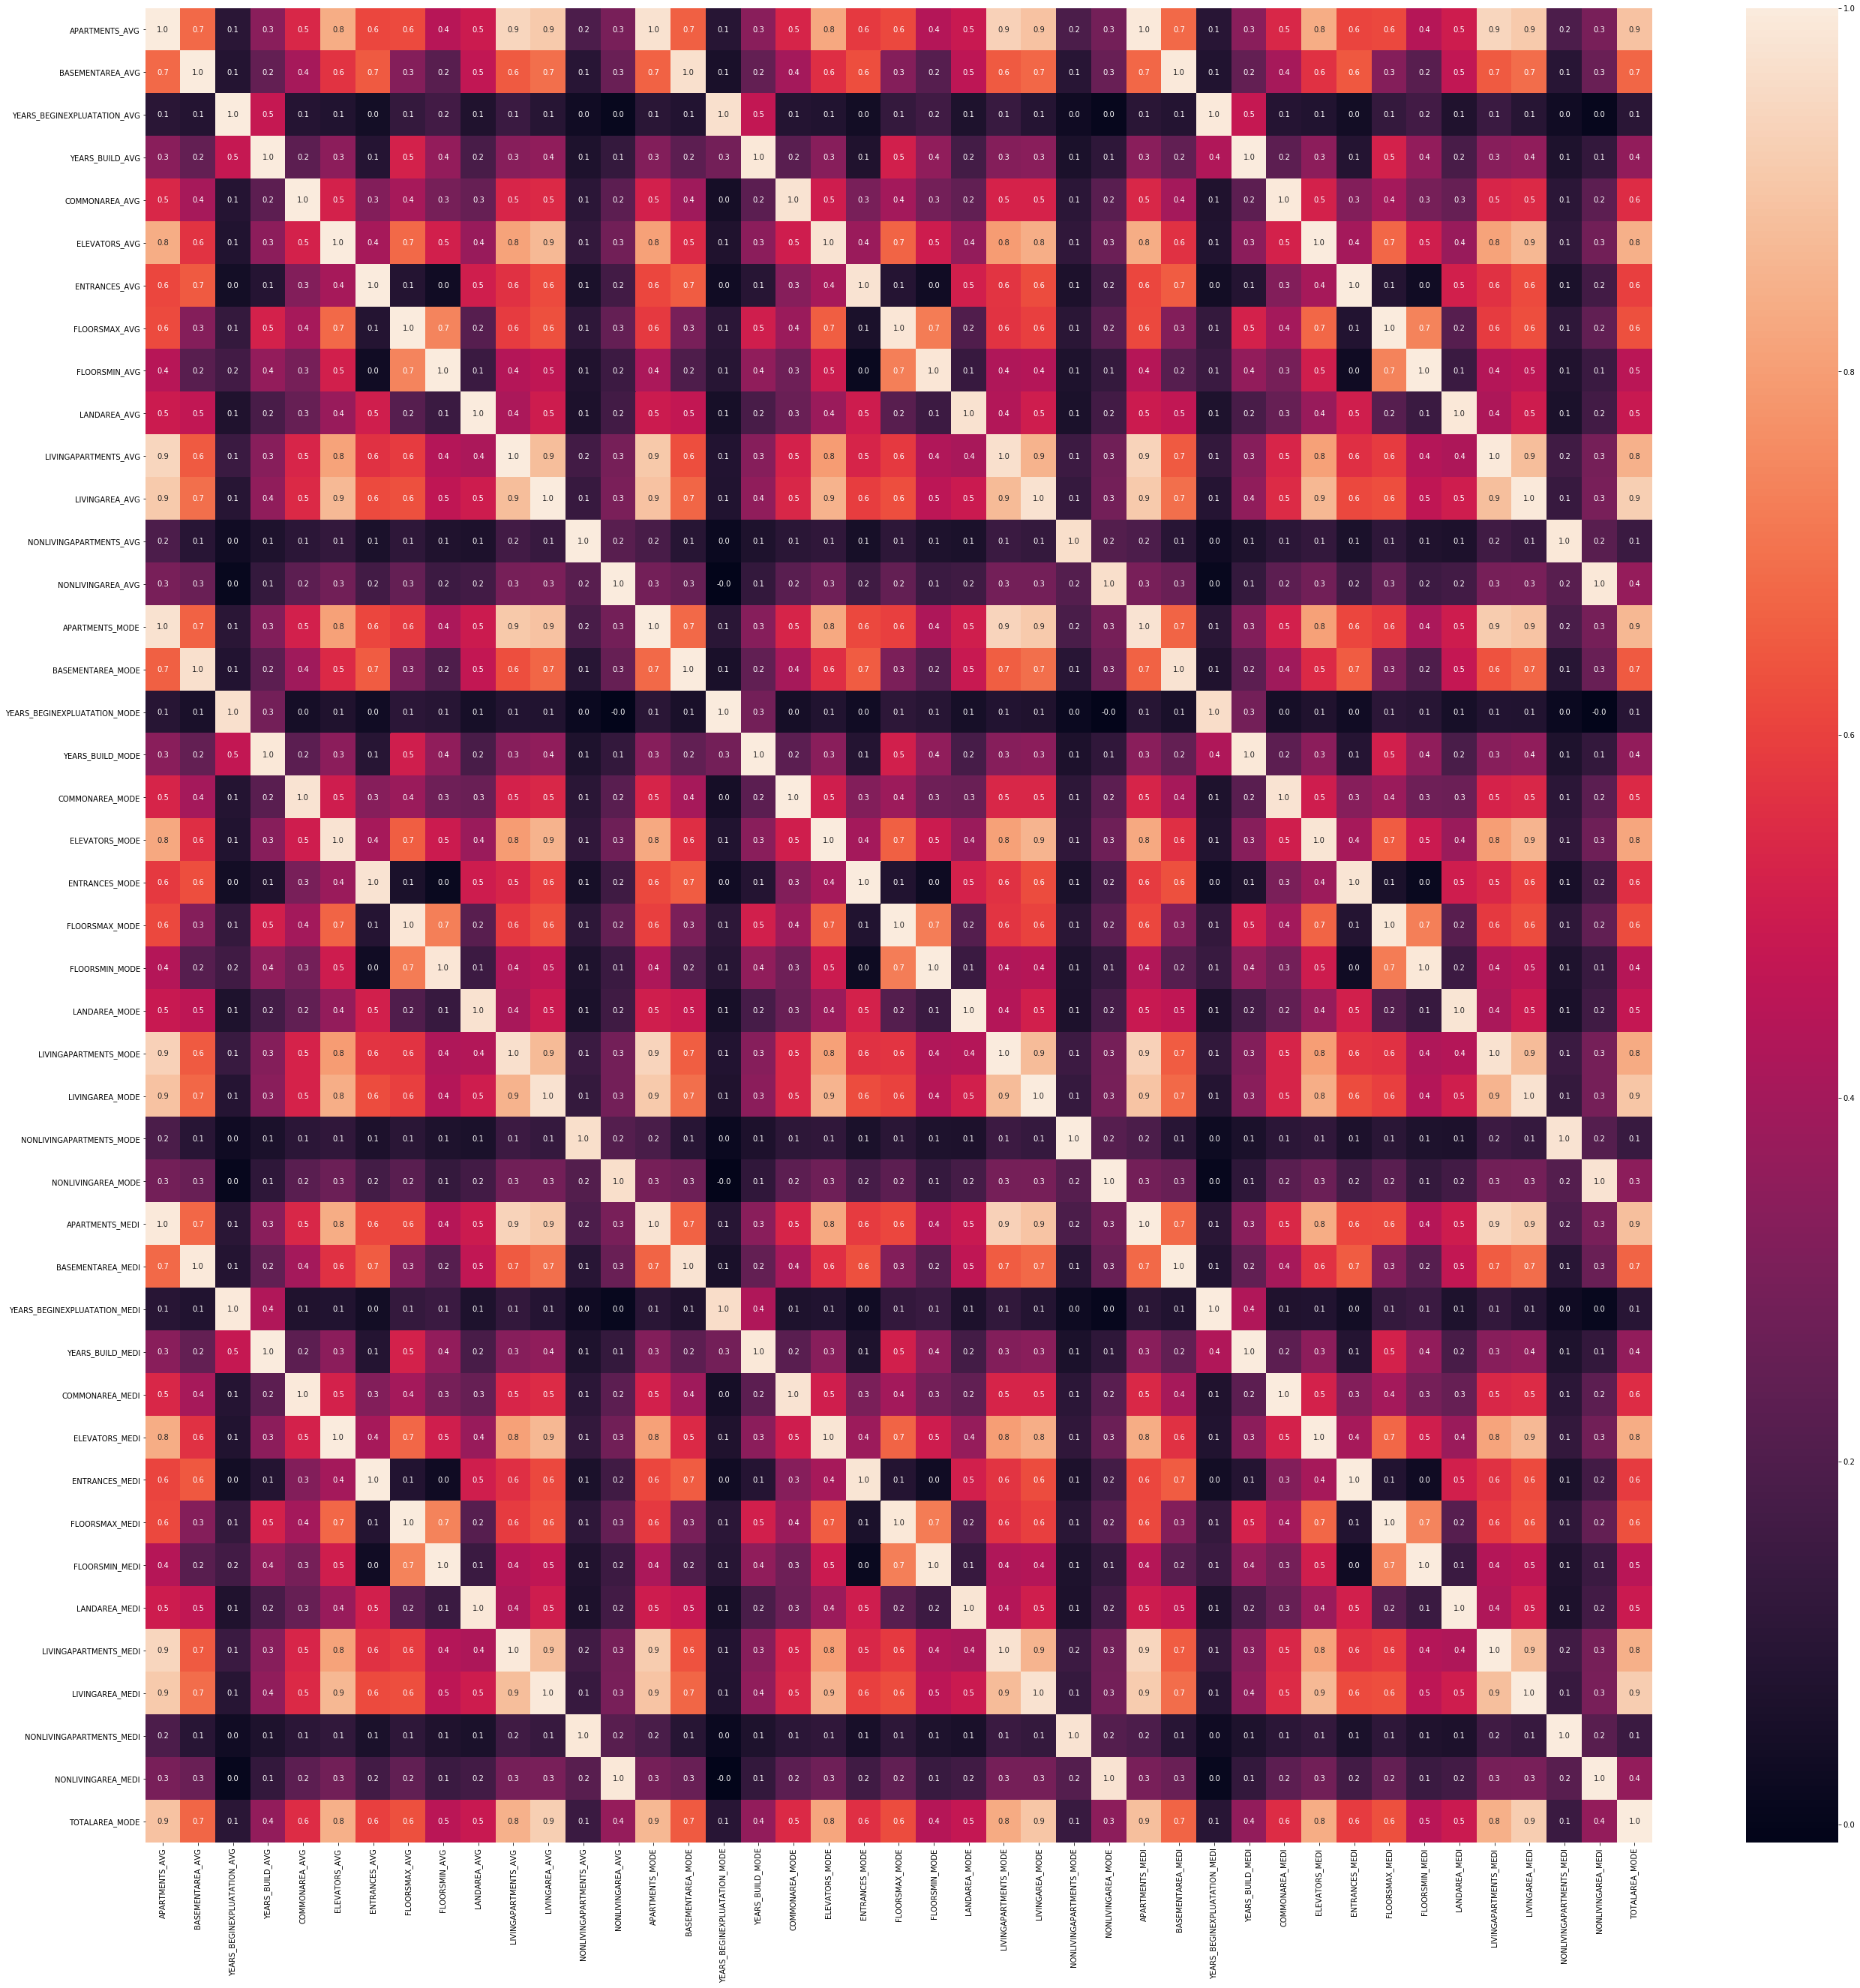

In [14]:
#floatの中で相関関係が強い、上記ヒートマップの中心部分のみで再度ヒートマップを出力
df_float_corr11 = df_float_corr.iloc[11:-11,11:-11]
plt.figure(figsize=(45, 45)) 
sns.heatmap(df_float_corr11, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_float_corr_11-11.png')

In [15]:
#一旦Trainデータに分離し、Targetをくっつける。
df_train2=df_train.loc[:,["SK_ID_CURR","TARGET"]].merge(df, on=["SK_ID_CURR"])
display(df_train2.shape)
df_train2.describe()

(307511, 122)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.435968,1990.862444,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.954593,2277.645106,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.000000,289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.000000,1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.000000,2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,17912.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
#上記のTrainﾃﾞｰﾀに対し、int,float型特徴量に対し、Targetとの影響度合いを確認
df_train2_intfloat = df_train2.select_dtypes(include=["int64","float64"])
df_train2_intfloat_corr = df_train2_intfloat.corr()

df_train2_intfloat_corr_target  = df_train2_intfloat_corr["TARGET"].sort_values(ascending=False)
print(df_train2_intfloat_corr_target)

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819


In [17]:
#float型に対し特徴量同士の相関係数が0.8以上の特徴量を削除。（Targetとの相関が弱いものばかりなので消してよいと判断）
for column in df_float_corr11.columns:
    for ck_column in df.columns:
        if column == ck_column:
            for del_index in df_float_corr11[df_float_corr11.loc[:,column] >= 0.8].index:
                if del_index != column[:column.rfind("_")]+"_MODE":
                    for ck_column2 in df.columns:
                        if (del_index == ck_column2 and del_index != column):
                            del df[del_index]
df.shape

(356255, 89)

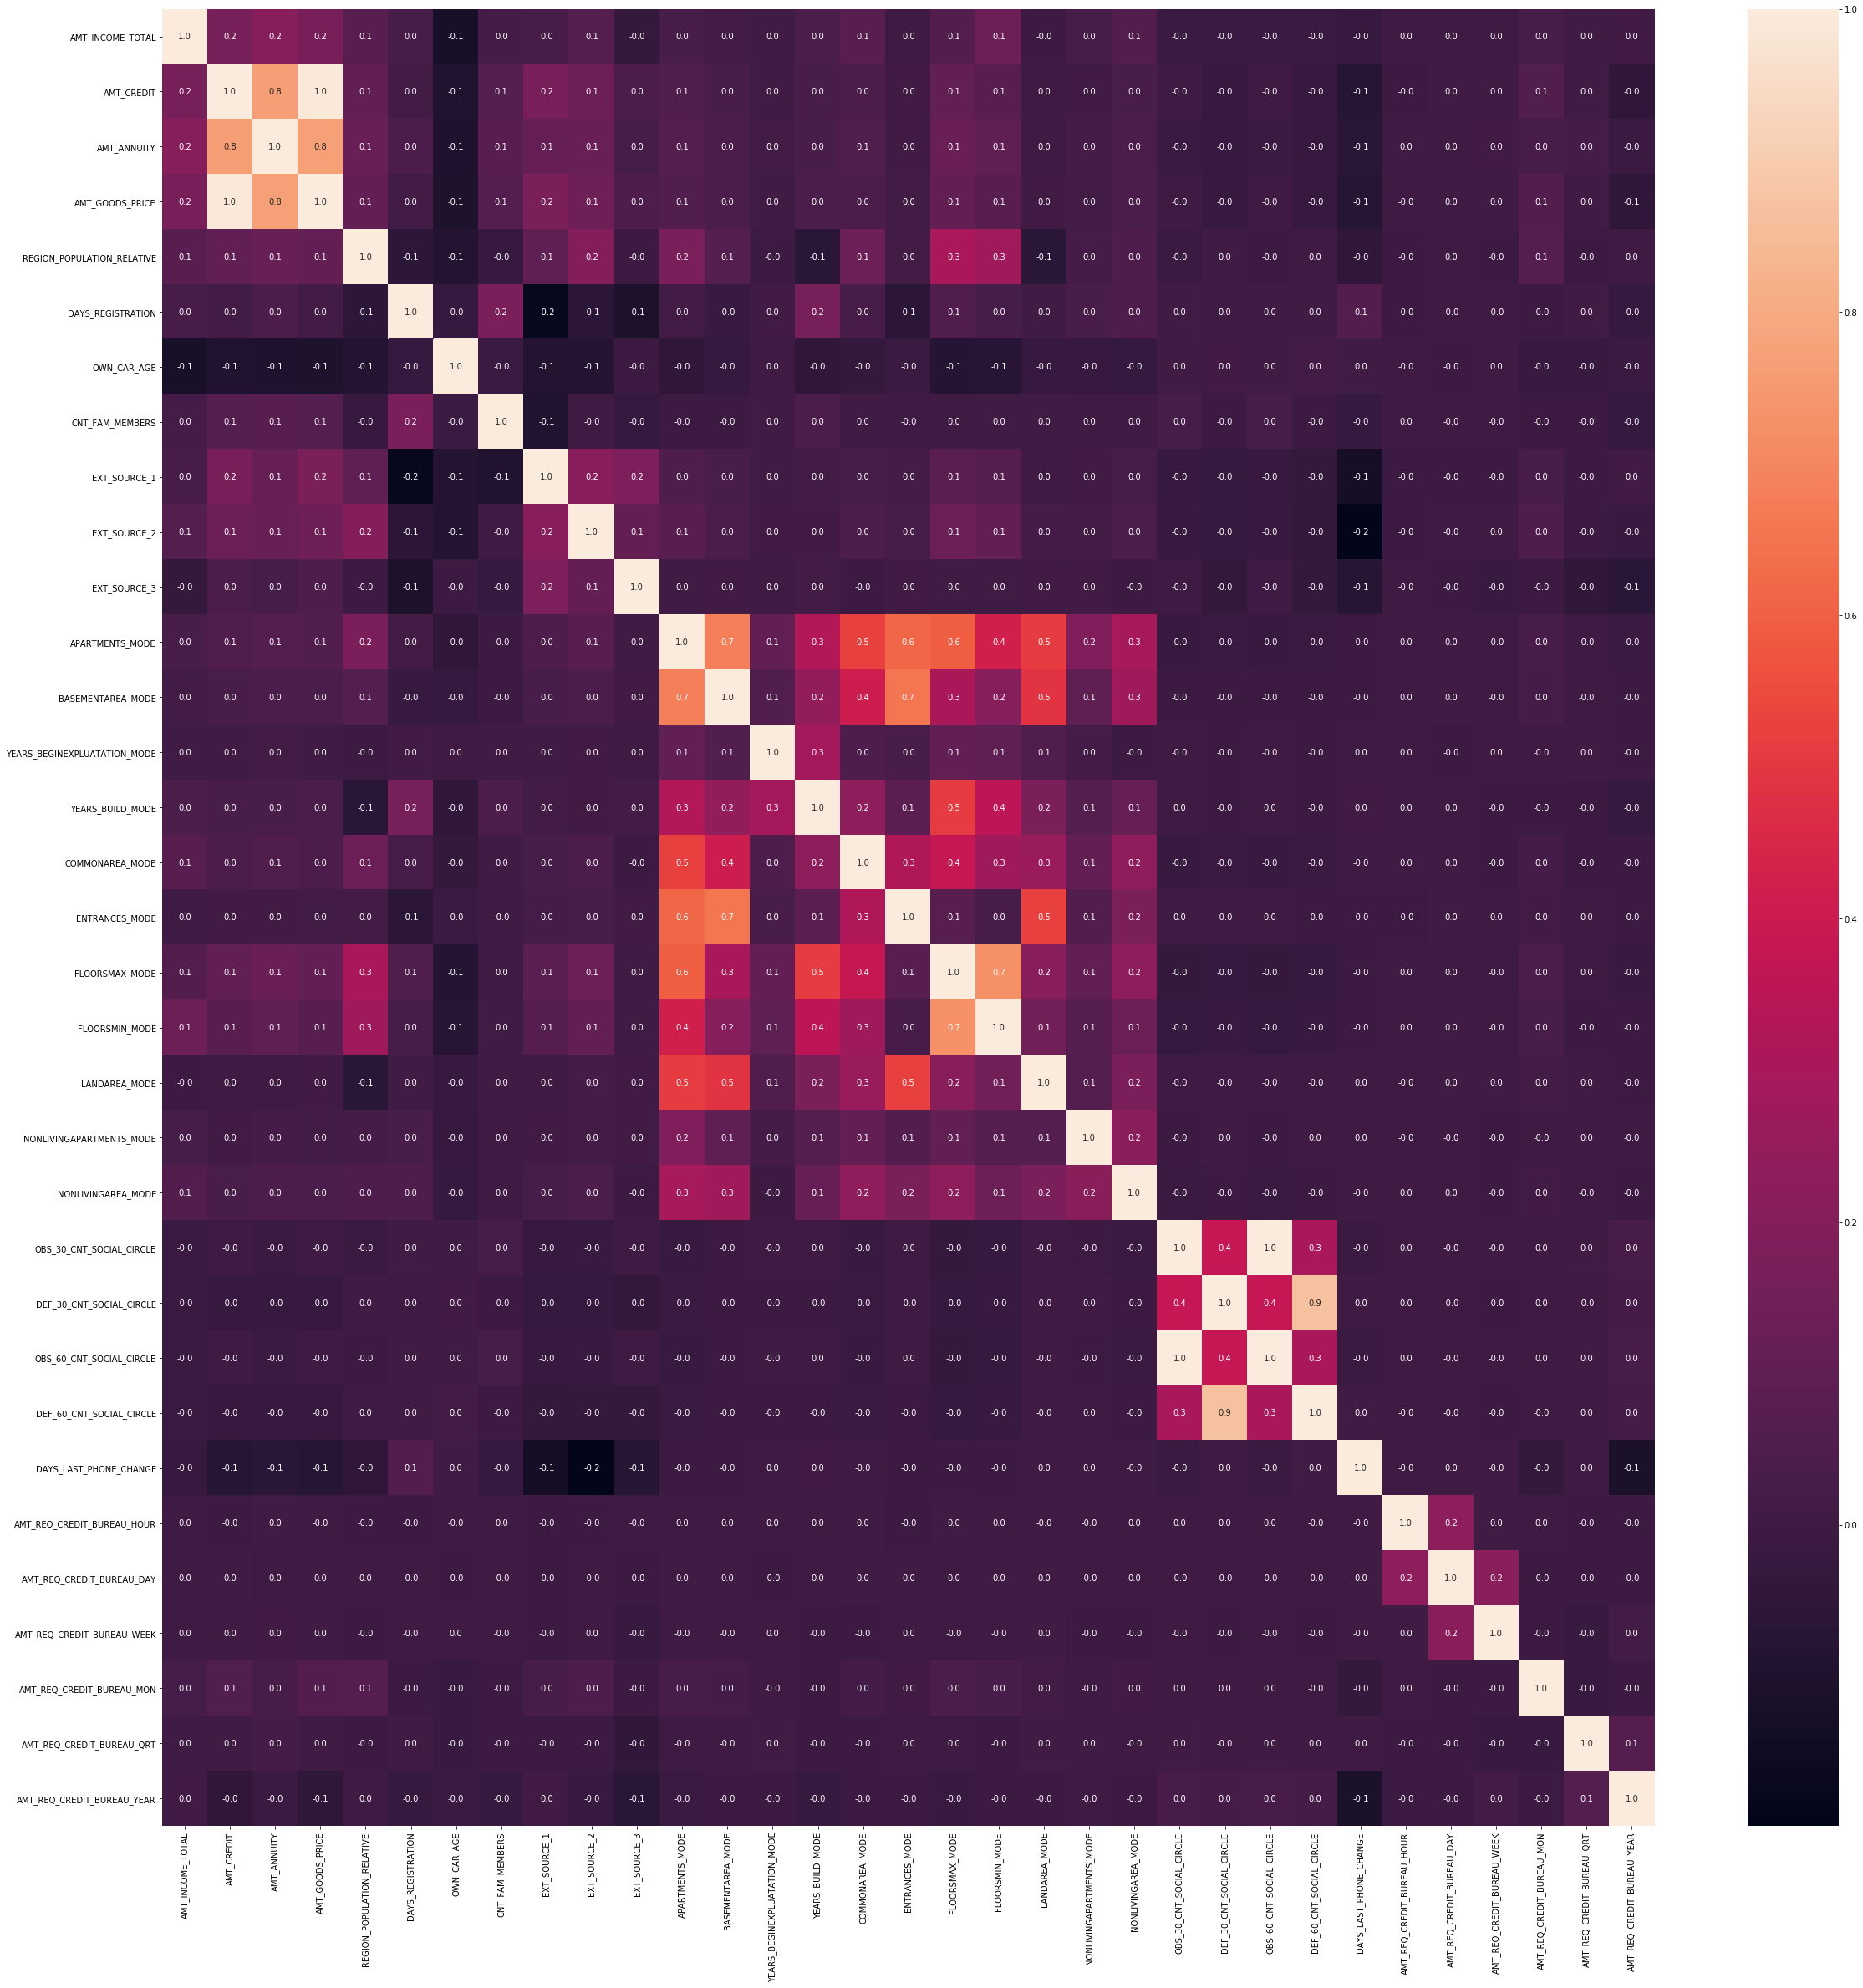

In [18]:
#削除した結果をヒートマップで確認
df_float2 = df.select_dtypes(include="float64")
df_float2_corr = df_float2.corr()

plt.figure(figsize=(40, 40)) 
sns.heatmap(df_float2_corr, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_float2_corr.png')

In [19]:
#まだ特徴量同士の相関係数が高い箇所があるので、削除
for column in df_float2_corr.columns:
    for ck_column in df.columns:
        if column == ck_column:
            for del_index in df_float2_corr[df_float2_corr.loc[:,column] >= 0.8].index:
                for ck_column2 in df.columns:
                    if (del_index == ck_column2 and del_index != column):
                        del df[del_index]
df.shape

(356255, 86)

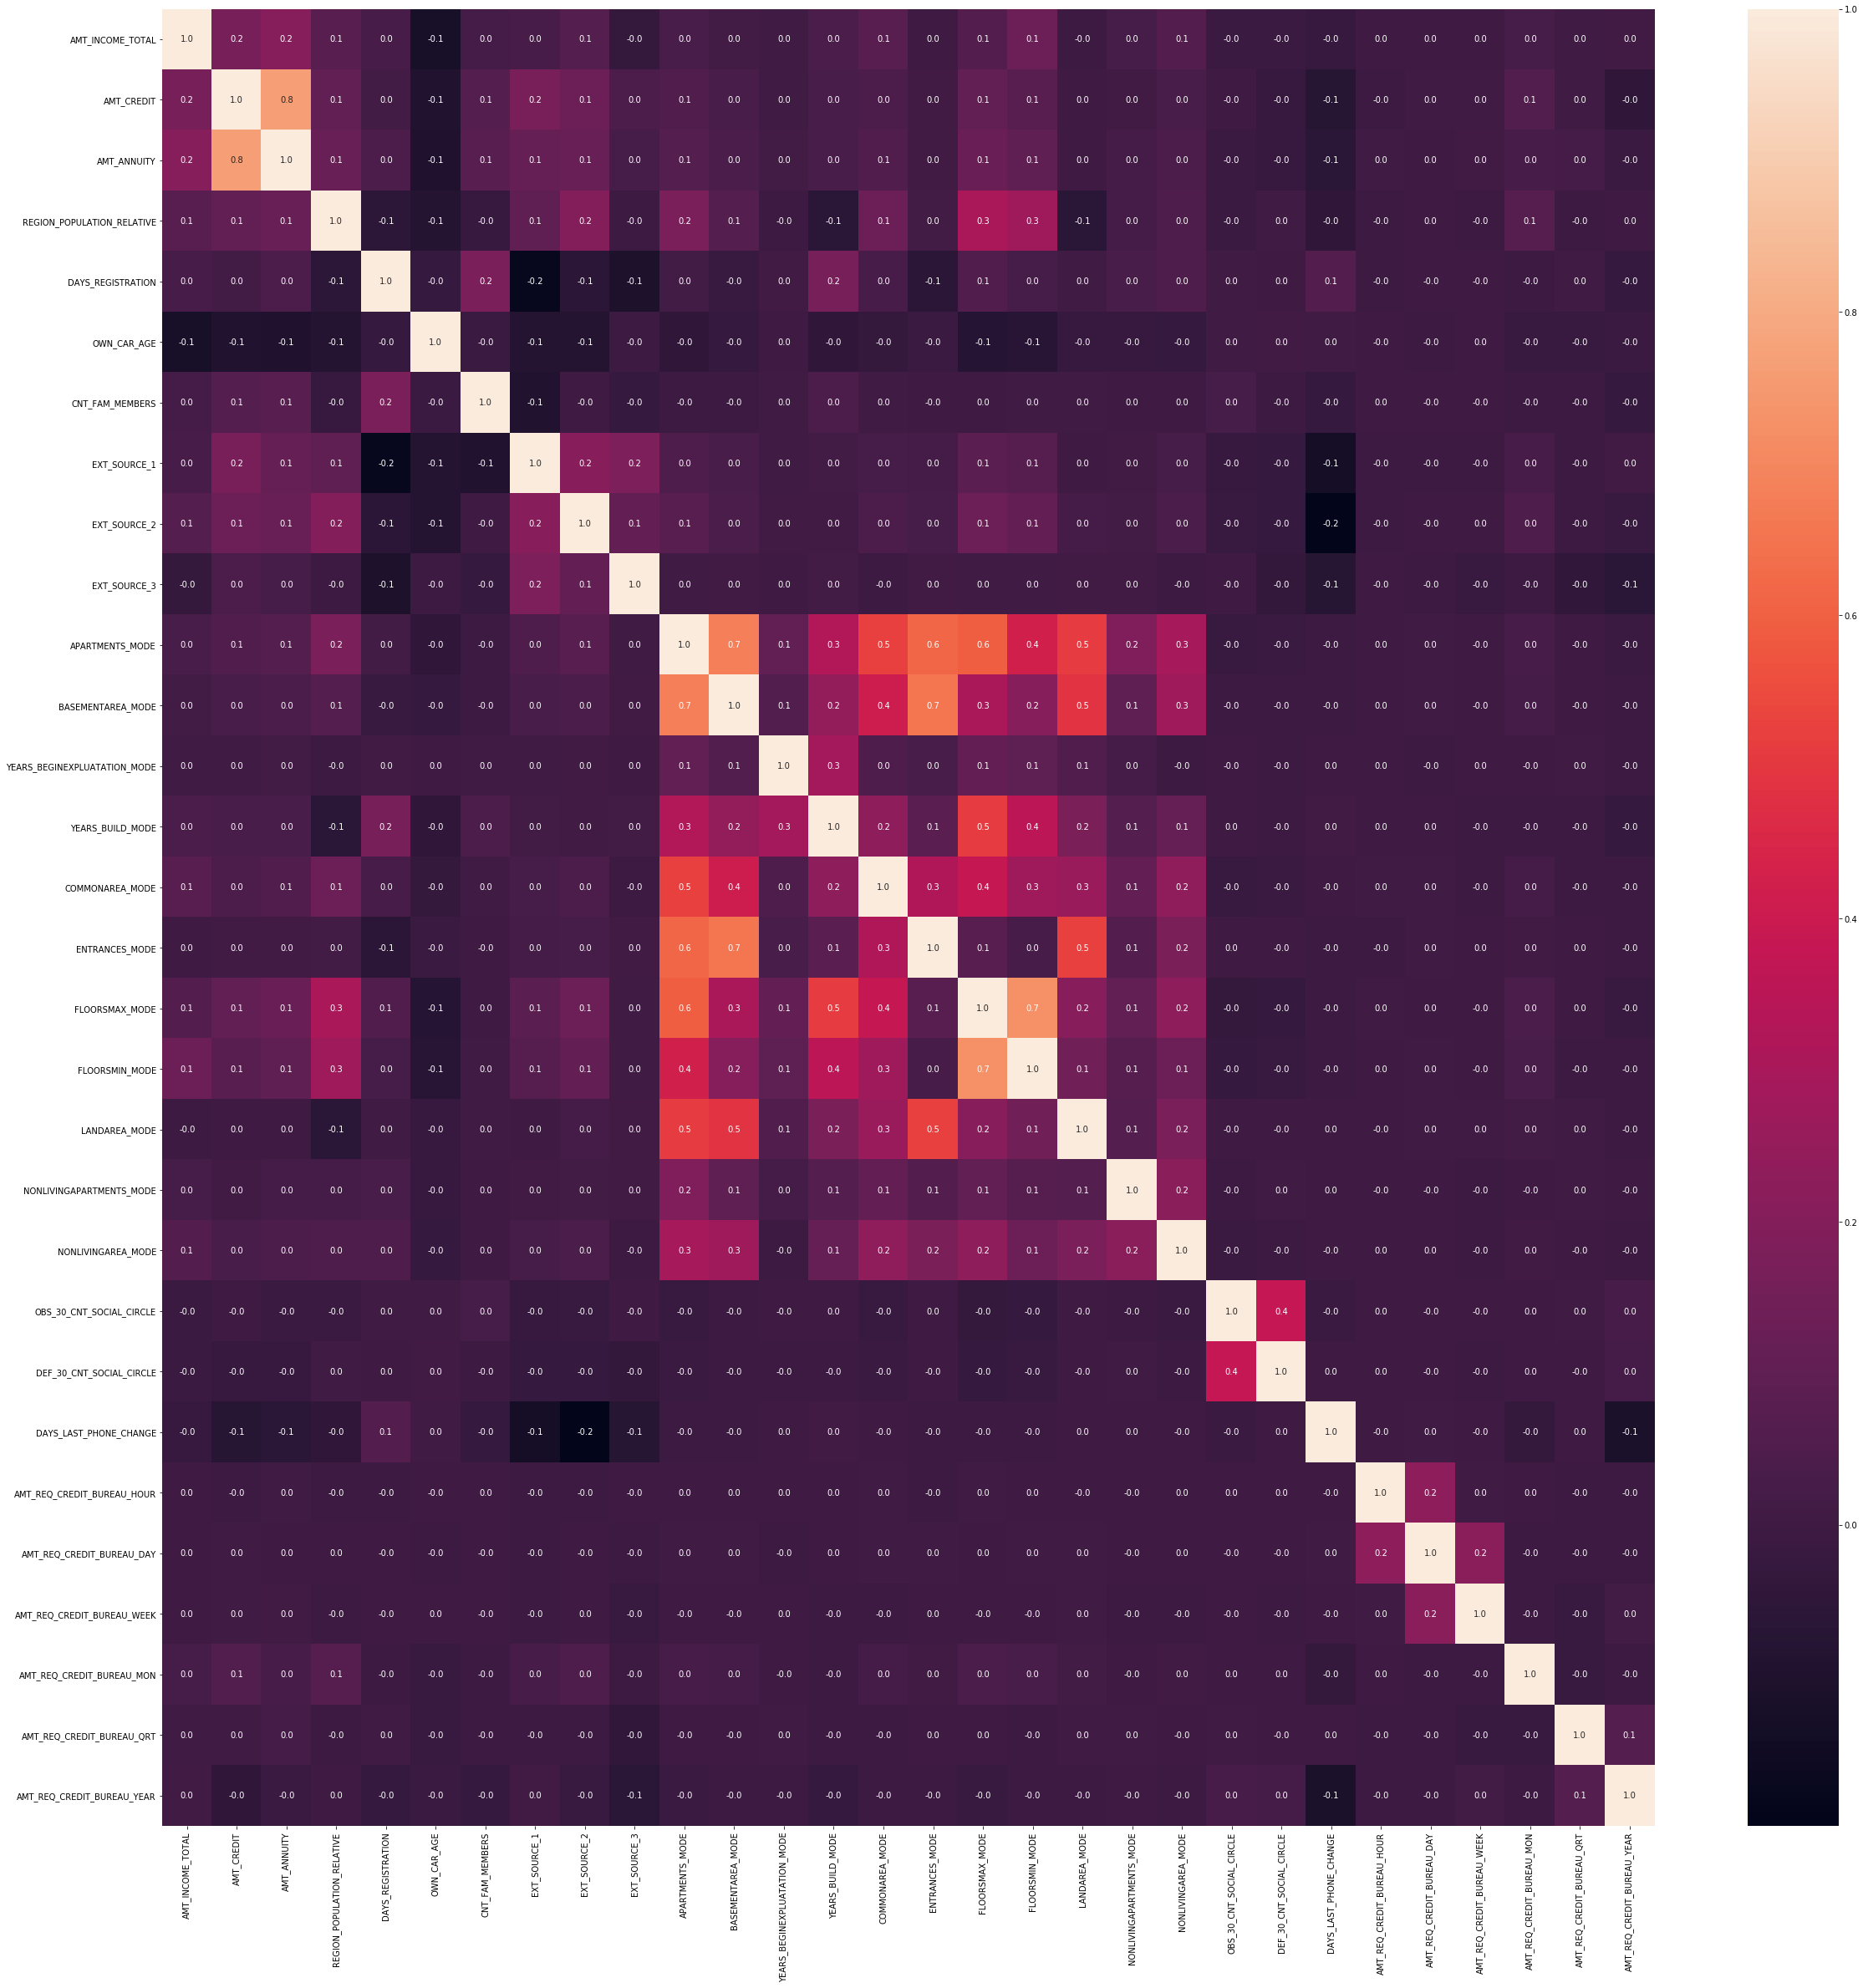

In [20]:
#結果をヒートマップで確認
df_float3 = df.select_dtypes(include="float64")
df_float3_corr = df_float3.corr()

plt.figure(figsize=(40, 40)) 
sns.heatmap(df_float3_corr, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_float3_corr.png')

In [21]:
#ojdect型にてint等と同様に、各特徴量内が何種類の数値になっているか確認
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [22]:
#欠損数を確認
df.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 2203
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE               111996
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            243092
HOUSETYPE_MODE                177916
WALLSMATERIAL_MODE            180234
EMERGENCYSTATE_MODE           167964
dtype: int64

In [23]:
#object型の全特徴量について、中身の要素ごとの数を確認
for value_num in df.select_dtypes('object').columns:
    display(df[value_num].value_counts(dropna=False))

Cash loans         326537
Revolving loans     29718
Name: NAME_CONTRACT_TYPE, dtype: int64

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

N    235235
Y    121020
Name: FLAG_OWN_CAR, dtype: int64

Y    246970
N    109285
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
NaN                  2203
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

Working                 183307
Commercial associate     83019
Pensioner                64635
State servant            25235
Unemployed                  23
Student                     20
Businessman                 11
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    252379
Higher education                  87379
Incomplete higher                 12001
Lower secondary                    4291
Academic degree                     205
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 228715
Single / not married     52480
Civil marriage           34036
Separated                22725
Widow                    18297
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      316513
With parents            17074
Municipal apartment     12800
Rented apartment         5599
Office apartment         3024
Co-op apartment          1245
Name: NAME_HOUSING_TYPE, dtype: int64

NaN                      111996
Laborers                  63841
Sales staff               37174
Core staff                31931
Managers                  24945
Drivers                   21376
High skill tech staff     13234
Accountants               11441
Medicine staff             9853
Security staff             7636
Cooking staff              6840
Cleaning staff             5309
Private service staff      3107
Low-skill Laborers         2365
Waiters/barmen staff       1526
Secretaries                1518
Realty agents               889
HR staff                    667
IT staff                    607
Name: OCCUPATION_TYPE, dtype: int64

TUESDAY      63652
WEDNESDAY    60391
MONDAY       59120
THURSDAY     59009
FRIDAY       57588
SATURDAY     38455
SUNDAY       18040
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

Business Entity Type 3    78832
XNA                       64648
Self-employed             44332
Other                     19390
Medicine                  12909
Business Entity Type 2    12032
Government                11912
School                    10180
Trade: type 7              9134
Kindergarten               7918
Construction               7760
Business Entity Type 1     6871
Transport: type 4          6282
Trade: type 3              4070
Industry: type 9           3867
Industry: type 3           3767
Security                   3719
Housing                    3393
Military                   3164
Industry: type 11          3120
Bank                       2881
Police                     2782
Agriculture                2746
Transport: type 2          2652
Postal                     2451
Security Ministries        2315
Trade: type 2              2142
Restaurant                 2095
Services                   1877
University                 1548
Industry: type 7           1524
Transpor

NaN                      243092
reg oper account          85954
reg oper spec account     14070
not specified              6600
org spec account           6539
Name: FONDKAPREMONT_MODE, dtype: int64

NaN                 177916
block of flats      175162
specific housing      1761
terraced house        1416
Name: HOUSETYPE_MODE, dtype: int64

NaN             180234
Panel            77309
Stone, brick     75249
Block            10681
Wooden            6156
Mixed             2649
Monolithic        2068
Others            1909
Name: WALLSMATERIAL_MODE, dtype: int64

No     185607
NaN    167964
Yes      2684
Name: EMERGENCYSTATE_MODE, dtype: int64

In [24]:
#"NAME_TYPE_SUITE"について、"Other_B","Other_A"とあるのを"Other_A"に集約
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].replace("Other_B","Other_A")
#欠損を最頻値である'Unaccompanied'に集約
df=df.fillna({'NAME_TYPE_SUITE': 'Unaccompanied'})
#結果確認
display(df["NAME_TYPE_SUITE"].value_counts(dropna=False))

Unaccompanied      290456
Family              46030
Spouse, partner     12818
Children             3675
Other_A              2956
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
#"NAME_FAMILY_STATUS"について、""Unknown"を"最頻値である"Married"に集約
df["NAME_FAMILY_STATUS"]=df["NAME_FAMILY_STATUS"].replace("Unknown", "Married")
df["NAME_FAMILY_STATUS"].value_counts()

Married                 228717
Single / not married     52480
Civil marriage           34036
Separated                22725
Widow                    18297
Name: NAME_FAMILY_STATUS, dtype: int64

In [26]:
#欠損が多すぎる特徴量を削除
df = df.drop(["OCCUPATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 81 columns):
SK_ID_CURR                      356255 non-null int64
NAME_CONTRACT_TYPE              356255 non-null object
CODE_GENDER                     356255 non-null object
FLAG_OWN_CAR                    356255 non-null object
FLAG_OWN_REALTY                 356255 non-null object
CNT_CHILDREN                    356255 non-null int64
AMT_INCOME_TOTAL                356255 non-null float64
AMT_CREDIT                      356255 non-null float64
AMT_ANNUITY                     356219 non-null float64
NAME_TYPE_SUITE                 356255 non-null object
NAME_INCOME_TYPE                356255 non-null object
NAME_EDUCATION_TYPE             356255 non-null object
NAME_FAMILY_STATUS              356255 non-null object
NAME_HOUSING_TYPE               356255 non-null object
REGION_POPULATION_RELATIVE      356255 non-null float64
DAYS_BIRTH                      356255 non-null int64
DAYS_EMPL

In [27]:
#floatの欠損の割合を確認
df.select_dtypes("float64").isnull().sum()/len(df)

AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000101
REGION_POPULATION_RELATIVE      0.000000
DAYS_REGISTRATION               0.000000
OWN_CAR_AGE                     0.660316
CNT_FAM_MEMBERS                 0.000006
EXT_SOURCE_1                    0.544301
EXT_SOURCE_2                    0.001875
EXT_SOURCE_3                    0.195458
APARTMENTS_MODE                 0.505110
BASEMENTAREA_MODE               0.582684
YEARS_BEGINEXPLUATATION_MODE    0.485223
YEARS_BUILD_MODE                0.663306
COMMONAREA_MODE                 0.697141
ENTRANCES_MODE                  0.500785
FLOORSMAX_MODE                  0.494985
FLOORSMIN_MODE                  0.676785
LANDAREA_MODE                   0.591835
NONLIVINGAPARTMENTS_MODE        0.692933
NONLIVINGAREA_MODE              0.549511
OBS_30_CNT_SOCIAL_CIRCLE        0.002947
DEF_30_CNT_SOCIAL_CIRCLE        0.002947
DAYS_LAST_PHONE_CHANGE          0.000003
AMT_REQ_CREDIT_B

In [28]:
#floatで欠損割合が50%以上のものを削除。ただし、Targetと影響が強い、EXT_SOURCE_1は残す。
df2 = df.drop(df.select_dtypes("float64").isnull().sum().index[df.select_dtypes("float64").isnull().sum()/len(df) >= 0.55],axis=1)
df2=df2.drop(["APARTMENTS_MODE", "ENTRANCES_MODE", "NONLIVINGAREA_MODE"],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 71 columns):
SK_ID_CURR                      356255 non-null int64
NAME_CONTRACT_TYPE              356255 non-null object
CODE_GENDER                     356255 non-null object
FLAG_OWN_CAR                    356255 non-null object
FLAG_OWN_REALTY                 356255 non-null object
CNT_CHILDREN                    356255 non-null int64
AMT_INCOME_TOTAL                356255 non-null float64
AMT_CREDIT                      356255 non-null float64
AMT_ANNUITY                     356219 non-null float64
NAME_TYPE_SUITE                 356255 non-null object
NAME_INCOME_TYPE                356255 non-null object
NAME_EDUCATION_TYPE             356255 non-null object
NAME_FAMILY_STATUS              356255 non-null object
NAME_HOUSING_TYPE               356255 non-null object
REGION_POPULATION_RELATIVE      356255 non-null float64
DAYS_BIRTH                      356255 non-null int64
DAYS_EMPL

In [29]:
#float型について欠損数を確認
df2.select_dtypes("float64").isnull().sum()

AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
REGION_POPULATION_RELATIVE           0
DAYS_REGISTRATION                    0
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    193910
EXT_SOURCE_2                       668
EXT_SOURCE_3                     69633
YEARS_BEGINEXPLUATATION_MODE    172863
FLOORSMAX_MODE                  176341
OBS_30_CNT_SOCIAL_CIRCLE          1050
DEF_30_CNT_SOCIAL_CIRCLE          1050
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       47568
AMT_REQ_CREDIT_BUREAU_DAY        47568
AMT_REQ_CREDIT_BUREAU_WEEK       47568
AMT_REQ_CREDIT_BUREAU_MON        47568
AMT_REQ_CREDIT_BUREAU_QRT        47568
AMT_REQ_CREDIT_BUREAU_YEAR       47568
dtype: int64

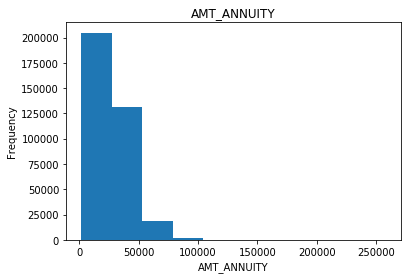

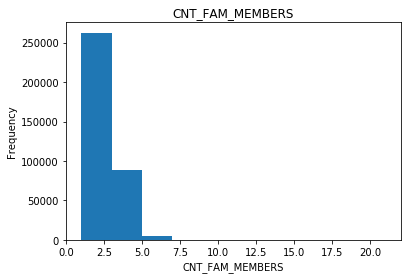

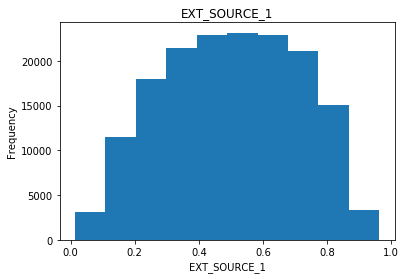

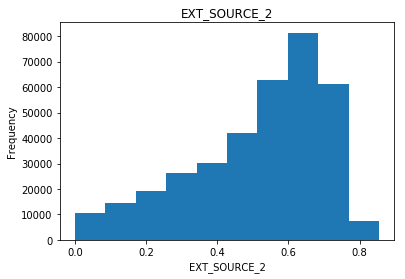

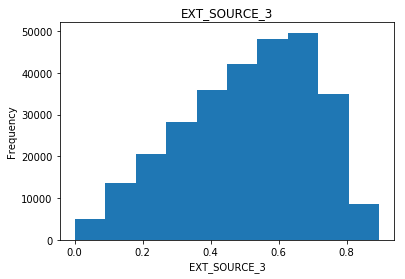

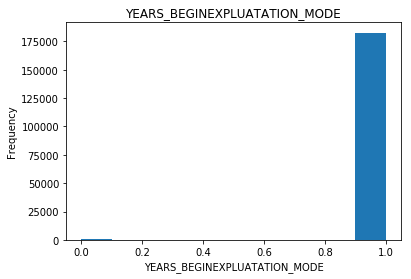

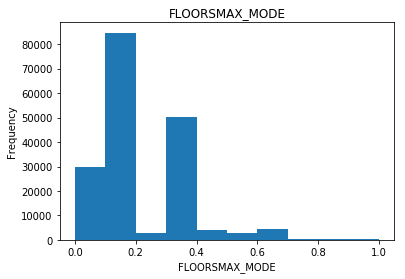

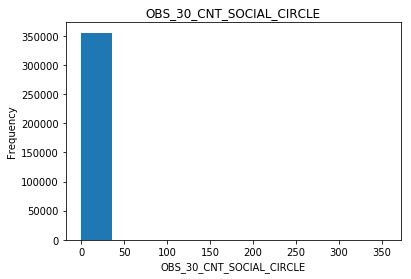

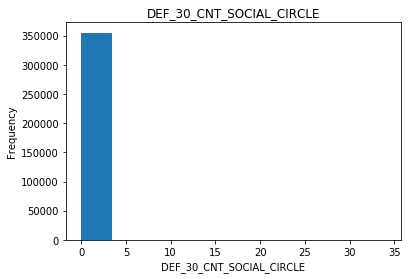

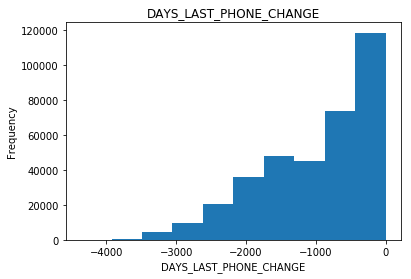

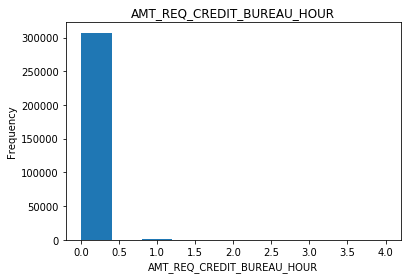

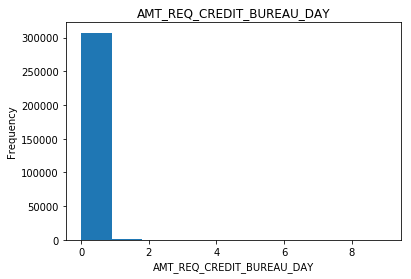

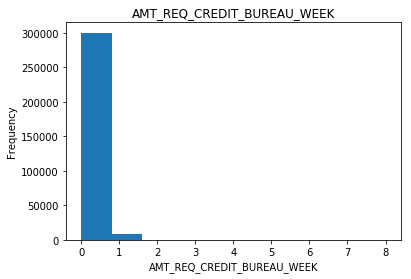

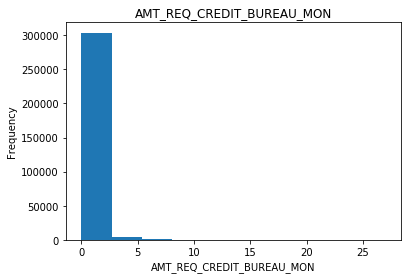

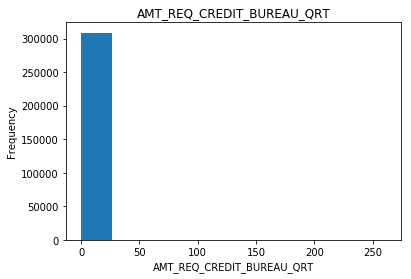

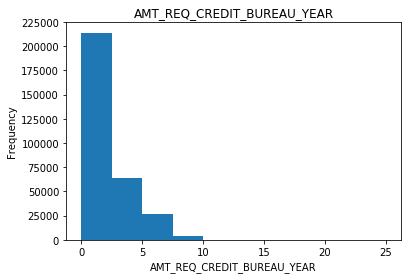

In [30]:
#欠損のある特徴量の分布を確認
for column in df2.select_dtypes("float64").isnull().any().index[df2.select_dtypes("float64").isnull().sum()!=0]:
    df2[column].plot.hist(title = column)
    plt.xlabel(column)
    plt.show()

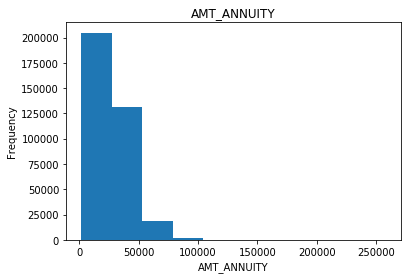

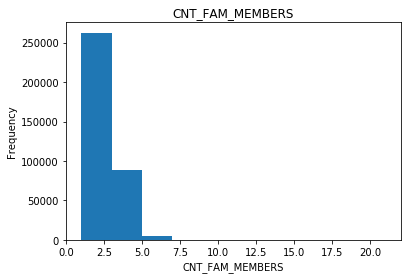

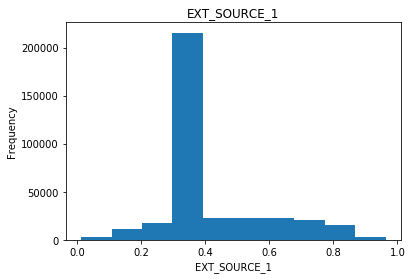

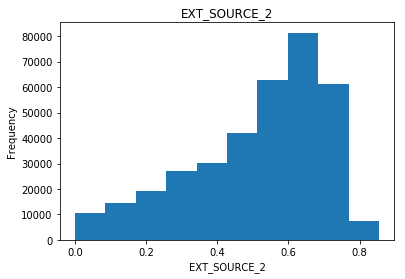

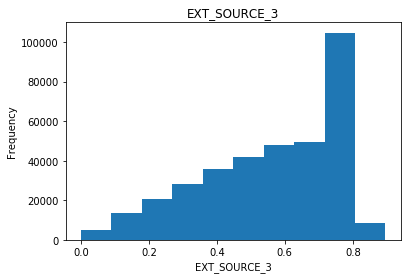

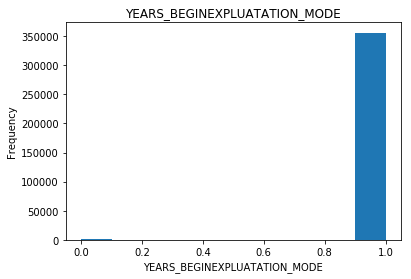

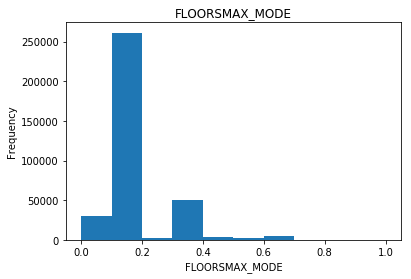

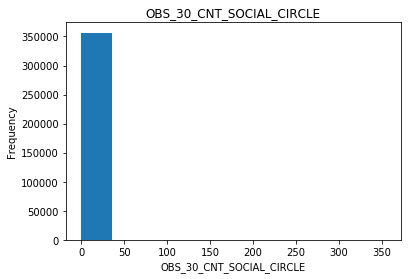

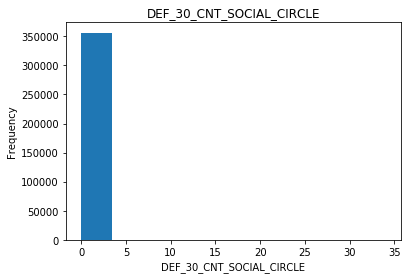

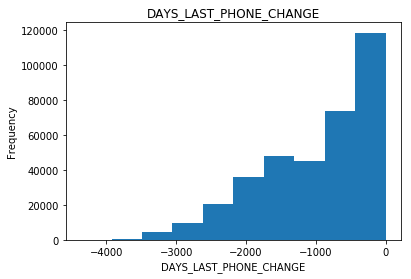

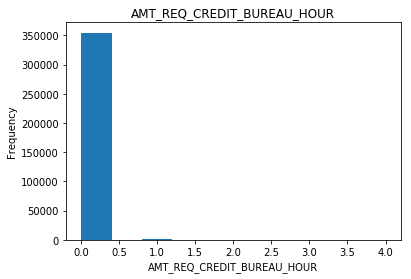

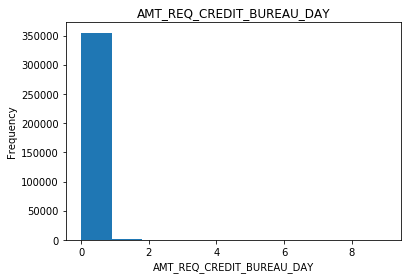

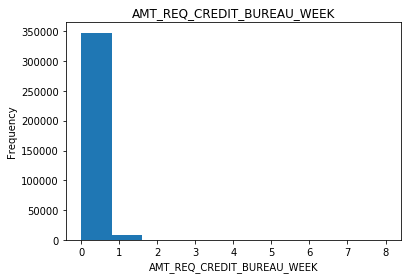

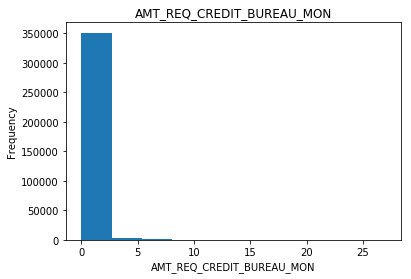

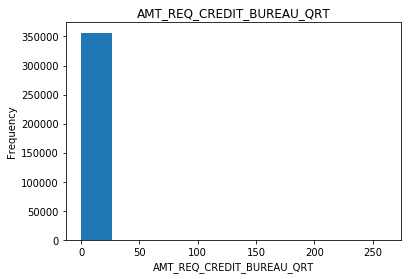

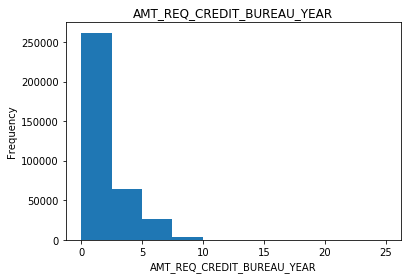

AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
REGION_POPULATION_RELATIVE      0
DAYS_REGISTRATION               0
CNT_FAM_MEMBERS                 0
EXT_SOURCE_1                    0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
AMT_REQ_CREDIT_BUREAU_HOUR      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT_BUREAU_QRT       0
AMT_REQ_CREDIT_BUREAU_YEAR      0
dtype: int64

In [31]:
#欠損を最頻値で埋めて分布を再確認。
for column in df2.select_dtypes("float64").isnull().any().index[df2.select_dtypes("float64").isnull().sum()!=0]:
    df2[column]=df2[column].fillna(df2[column].mode()[0])
    df2[column].plot.hist(title = column)
    plt.xlabel(column)
    plt.show()
    
df2.select_dtypes("float64").isnull().sum()

In [32]:
#最終的に全特徴量で欠損がないことを確認
df2.isnull().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [33]:
#object型特徴量に対し、1hot-Encodingを実施
df_1hot = pd.get_dummies(df2, columns=df2.select_dtypes(include="object").columns)
df_1hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 164 entries, SK_ID_CURR to ORGANIZATION_TYPE_XNA
dtypes: float64(20), int64(40), uint8(104)
memory usage: 201.1 MB


In [34]:
#前処理が完了したので、TrainﾃﾞｰﾀとTestﾃﾞｰﾀに分ける
df_train_last = df_train.loc[:,["SK_ID_CURR","TARGET"]].merge(df_1hot, on=["SK_ID_CURR"])
display(df_train_last.shape)
X_last = df_train_last.drop("TARGET",axis=1)
y_last = df_train_last.loc[:,["TARGET"]]
display(X_last.head())
display(y_last.head())

(307511, 165)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,0,202500.0,406597.5,24700.5,0.018801,25,637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,270000.0,1293502.5,35698.5,0.003541,45,1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,67500.0,135000.0,6750.0,0.010032,52,225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,0.008019,52,3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,0.028663,54,3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0


,TARGET
0,1
1,0
2,0
3,0
4,0


In [35]:
display(y_last["TARGET"].describe())
y_last["TARGET"].value_counts()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

0    282686
1     24825
Name: TARGET, dtype: int64

In [36]:
#RandomForestにて問題２同様にクロスバリデーション実施。
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier(random_state=0)
params = {
     'n_estimators'      : [5, 10, 20],
      'random_state'      : [0],
      'max_depth'         : [5, 10, 20]
}
gs2 = GridSearchCV(RFC, params,
                  scoring='roc_auc',
                  cv=3            # クロスバリデーションの分割数
                 )
gs2.fit(X_last, y_last)
# 探索した結果のベストスコアとパラメータの取得
print('Best Score:{}'.format(gs2.best_score_))
print('Best Params{}'.format(gs2.best_params_))          

C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

Best Score:0.6865043356895151
Best Params{'max_depth': 10, 'n_estimators': 20, 'random_state': 0}


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
params = {
     'n_estimators'     : [50, 100, 200],
      'random_state'    : [0],
      'learning_rate'   : [0.05, 0.1, 0.2]
}
gs3 = GridSearchCV(GBC, params,
                  scoring='roc_auc',
                  cv=3            # クロスバリデーションの分割数
                 )
gs3.fit(X_last, y_last)
# 探索した結果のベストスコアとパラメータの取得
print('Best Score:{}'.format(gs3.best_score_))
print('Best Params{}'.format(gs3.best_params_))          

C:\Users\anai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Best Score:0.6808044263322183
Best Params{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 0}


In [3]:
result_df = pd.DataFrame([["RandomForest", 0.6724], ["RandomForest", 0.6644], ["GradientBoosting", 0.6840]],
                         index=["欠損全部消し", "しっかり前処理", "しっかり前処理"],
                         columns=["model", "roc_auc"])
result_df

,model,roc_auc
欠損全部消し,RandomForest,0.6724
しっかり前処理,RandomForest,0.6644
しっかり前処理,GradientBoosting,0.6840


考察(しっかり前処理　グリッドサーチ1回目)
　・本格的に前処理をしてみたが、結局前処理として欠損をざっくり減らしたﾃﾞｰﾀのほうが精度が良かった。
　・精度が良いといわれるGradientBoostingClassifierだとRandomForestより2％精度が上がった。

In [52]:
result_df = pd.DataFrame([["RandomForest", 0.6724], ["RandomForest", 0.6865], ["GradientBoosting", 0.6808]],
                         index=["欠損全部消し", "しっかり前処理", "しっかり前処理"],
                         columns=["model", "roc_auc"])
result_df

,model,roc_auc
欠損全部消し,RandomForest,0.6724
しっかり前処理,RandomForest,0.6865
しっかり前処理,GradientBoosting,0.6808


考察(しっかり前処理　グリッドサーチ２回目＿Kaggleにアップするの忘れたため2回目を流した。)
　・何故か2回目でRandomForestの精度が上がり、GradientBoostingを上回った。

### 【問題5】最終的なモデルの選定 
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。
どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

とりあえず、RandomForestとGradientBoostingの両方をKaggleに提出する。

In [38]:
df_test_last = df_test.loc[:,["SK_ID_CURR"]].merge(df_1hot, on=["SK_ID_CURR"])
display(df_test_last.shape)
df_test_last.describe()

(48744, 164)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29416.182976,0.021226,43.526649,2043.568152,-4967.652716,-3051.712949,...,0.000287,0.000185,0.002503,0.026731,0.000718,0.009191,0.003570,0.018136,0.004534,0.190259
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16018.835215,0.014428,11.854446,2260.933234,3552.612035,1569.276709,...,0.016945,0.013587,0.049967,0.161299,0.026787,0.095428,0.059641,0.133443,0.067182,0.392510
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,0.000253,20.000000,1.000000,-23722.000000,-6348.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17953.875000,0.010006,34.000000,296.000000,-7459.250000,-4448.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26194.500000,0.018850,43.000000,1293.000000,-4490.000000,-3234.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,0.028663,53.000000,2910.000000,-1901.000000,-1706.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,0.072508,69.000000,17463.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y_gs3_pred_prba = gs3.predict_proba(df_test_last)

In [40]:
y_gs3_pred_prba

array([[0.9654126 , 0.0345874 ],
       [0.88907826, 0.11092174],
       [0.97481107, 0.02518893],
       ...,
       [0.64539404, 0.35460596],
       [0.55497096, 0.44502904],
       [0.83270032, 0.16729968]])

In [41]:
df_test_last["TARGET"] = y_gs3_pred_prba[:, 1]

In [42]:
submittion_gs3 = df_test_last.loc[:, ["SK_ID_CURR", "TARGET"]]

In [44]:
submittion_gs3.to_csv("submission_file_3.csv", index=False)

In [46]:
df_test_last = df_test.loc[:,["SK_ID_CURR"]].merge(df_1hot, on=["SK_ID_CURR"])

In [47]:
y_gs2_pred_prba = gs2.predict_proba(df_test_last)

In [48]:
y_gs2_pred_prba

array([[0.9152593 , 0.0847407 ],
       [0.90206516, 0.09793484],
       [0.9562836 , 0.0437164 ],
       ...,
       [0.93516125, 0.06483875],
       [0.89327759, 0.10672241],
       [0.868478  , 0.131522  ]])

In [49]:
df_test_last["TARGET"] = y_gs2_pred_prba[:, 1]

In [50]:
submittion_gs2 = df_test_last.loc[:, ["SK_ID_CURR", "TARGET"]]

In [51]:
submittion_gs2.to_csv("submission_file_2.csv", index=False)